<img style="float: right;" src="images/Earthwave_logo.png" alt="earthwave" width="90"/> <img style="float: right;" src="images/UZH_logo.jpg" alt="uzh" width="200"/> <img style="float: right;" src="images/ESA_logo.png" alt="esa" width="150"/>


<img src="images/GlaMBIE_logo.png" alt="logo" width="400"/>

#<strong><font color='#11847C'> Gla</font>cier <font color='#11847C'>M</font>ass <font color='#11847C'>B</font>alance <font color='#11847C'>I</font>ntercomparison <font color='#11847C'>E</font>xercise - *A community effort to reconcile measurements of glacier mass balance*</strong>

##This Jupyter Notebook can be used to explore and visualise the final results from the Glacier Mass Balance Intercomparison Exercise (GlaMBIE). In the following code, you can choose from the 19 regions covered by the GlaMBIE project, and investigate the findings, including the mass change of the region.

<div>

## <strong>Getting started</strong>
</div>

First, we import the necessary packages

In [ ]:
# Only run when connected to colab - necessary to use the helpers and plotting modules imported below
!git clone https://github.com/earthwave/glambie_demo_notebooks

In [2]:
from google.cloud.storage import Client
import pandas as pd
import glob, os
from pathlib import Path

from helpers import glambie_regions_dropdown, derivative_to_cumulative
from plotting import single_region_derivative_plot, single_region_cumulative_plot, region_comparison_plot

import seaborn as sns
sns.set_theme(palette='Set2', style='whitegrid', font_scale=1.2)

Next, we download the results of GlaMBIE from the WGMS server

In [2]:
# This section will be replaced once the data is hosted on WGMS server. The calls to the google bucket
# will be replaced with a simple download from wherever the files are hosted.
DATA_TRANSFER_BUCKET_NAME = "glambie-submissions"
PROJECT_NAME = "glambie"
storage_client = Client(project=PROJECT_NAME)

list_of_blobs_in_bucket = storage_client.list_blobs(DATA_TRANSFER_BUCKET_NAME)
downloaded_files = []

for blob in list_of_blobs_in_bucket:
    if 'glambie_csvs_to_publish_v3.zip' in blob.name:
        downloaded_files.append(blob.name)
        destination_file_path = os.path.join(blob.name)
        Path(destination_file_path).parent.mkdir(parents=True, exist_ok=True)
        with open(destination_file_path, "wb") as output_file:
            blob.download_to_file(output_file, raw_download=False)

In [ ]:
# This line is only needed when sharing the notebooks with GlaMBIE consortium - they will need to drag and drop the unpublished zip file into colab, and then unzip it to access data
!unzip glambie_csvs_to_publish_v3.zip

Each of the results files is downloaded to the current Colab working environment. You can inspect them if you click on the 'Folder' icon on the panel to the left.

<div>

## <strong>Choose a region</strong>
</div>

In this section, you can pick from the 19 RGI regions. The region that you chose will be read in from file.

In [3]:
# This line is only necessary when running locally. Once data is available online, it will be downloaded in 
# above cell to the local Colab working directory, so won't need to add local path to the start of 'data_directory' below
local_path = '/data/ox1/working/glambie/demo_notebooks'
#local_path = '/content' #for colab only

In [4]:
temporal_option = 'hydrological_years'
data_directory = os.path.join(local_path, 'glambie_csvs_to_publish_v3', temporal_option)

In [5]:
list_of_csvs = sorted(glob.glob(os.path.join(data_directory, '*.csv')))

Run this cell to select a GlaMBIE region from the dropdown list of options

In [6]:
# Use the dropdown menu to choose a region for analysis:
region = glambie_regions_dropdown()
region

Dropdown(description='Region:', options={'Alaska': '1_alaska', 'Western Canada & US': '2_western_canada_us', '…

In [7]:
for filename in list_of_csvs:
    if region.value in filename:
        region_dataframe = pd.read_csv(filename)

The following plot shows the change in elevation of your chosen region, for each year in the GlaMBIE study period (2000 - 2023). The y-axis is shown in *metres water equivalent*. This unit (1 m w.e. = 1,000 kg m−2) represents the mass change averaged over the glacier surface and allows comparison of the intensity of mass change in regions of different sizes. 

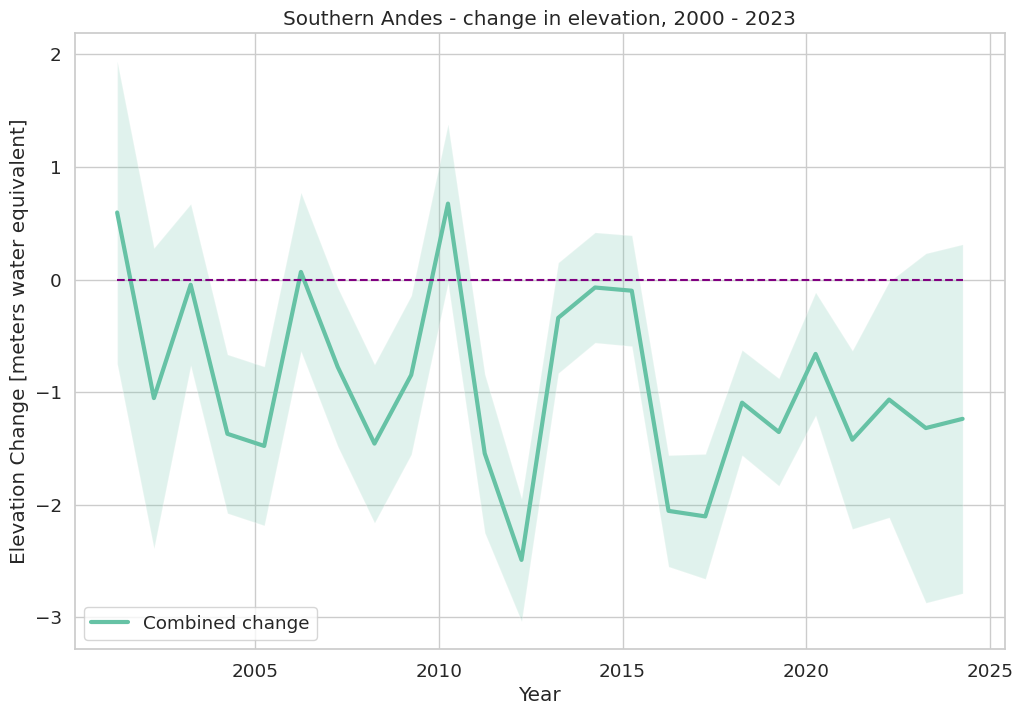

In [8]:
single_region_derivative_plot(region_dataframe, region.value, 'metres water equivalent')

<div>

## <strong>Plot ice loss for the reigon you have chosen</strong>
</div>

Next we will plot the cumulative change seen in your chosen region, over the full GlaMBIE study period.

In [9]:
# Start with a simple cumulative mwe plot - explain that the following plot shows how many m of ice each region has lost over the last 24 years
cumulative_data_all_mwe = derivative_to_cumulative(region_dataframe.start_dates, region_dataframe.end_dates, region_dataframe.combined_mwe)
cumulative_errors_all_mwe = derivative_to_cumulative(region_dataframe.start_dates, region_dataframe.end_dates, region_dataframe.combined_mwe_errors, calculate_as_errors=True)

The first plot again shows the cumulative change in *meters water equivalent*

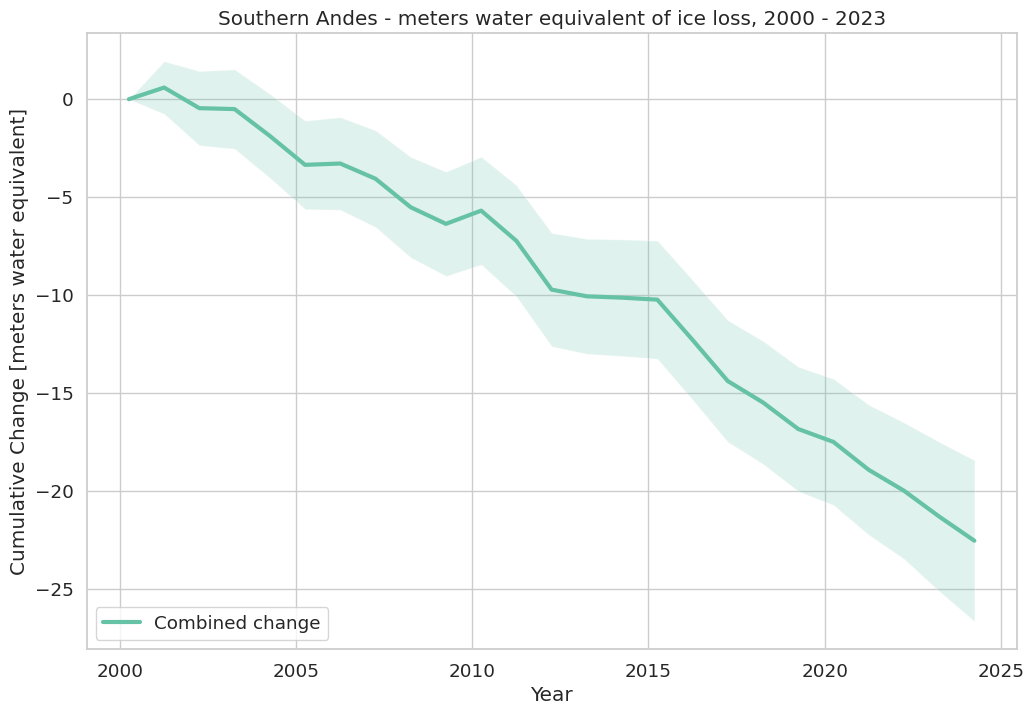

In [10]:
single_region_cumulative_plot(cumulative_data_all_mwe, cumulative_errors_all_mwe, region.value, 'metres water equivalent')

In [11]:
# convert to cumulative changes - Gt all
cumulative_data_all_gt = derivative_to_cumulative(region_dataframe.start_dates, region_dataframe.end_dates, region_dataframe.combined_gt)
cumulative_errors_all_gt = derivative_to_cumulative(region_dataframe.start_dates, region_dataframe.end_dates, region_dataframe.combined_gt_errors, calculate_as_errors=True)

In [12]:
cumulative_data_altimetry_gt = derivative_to_cumulative(region_dataframe.start_dates, region_dataframe.end_dates, region_dataframe.altimetry_gt)
cumulative_data_gravimetry_gt = derivative_to_cumulative(region_dataframe.start_dates, region_dataframe.end_dates, region_dataframe.gravimetry_gt)
cumulative_data_demdiff_and_glaciological_gt = derivative_to_cumulative(region_dataframe.start_dates, region_dataframe.end_dates, region_dataframe.demdiff_and_glaciological_gt)

In the next plot we visualise the change for your chosen region in units of Gigatonnes (1 Gt = 1,000,000,000,000 kg). This demonstrates the total mass of ice that has been lost from the region over the GlaMBIE study period. Additionally in this plot, the contributions to the total overall change from the different GlaMBIE observational sources as shown (as dashed lines). These include: altimetry (orange), gravimetry (blue) and DEM differencing & glaciological measurements (pink). For more details on each of these measurement techniques, see the GlaMBIE publication (add link).

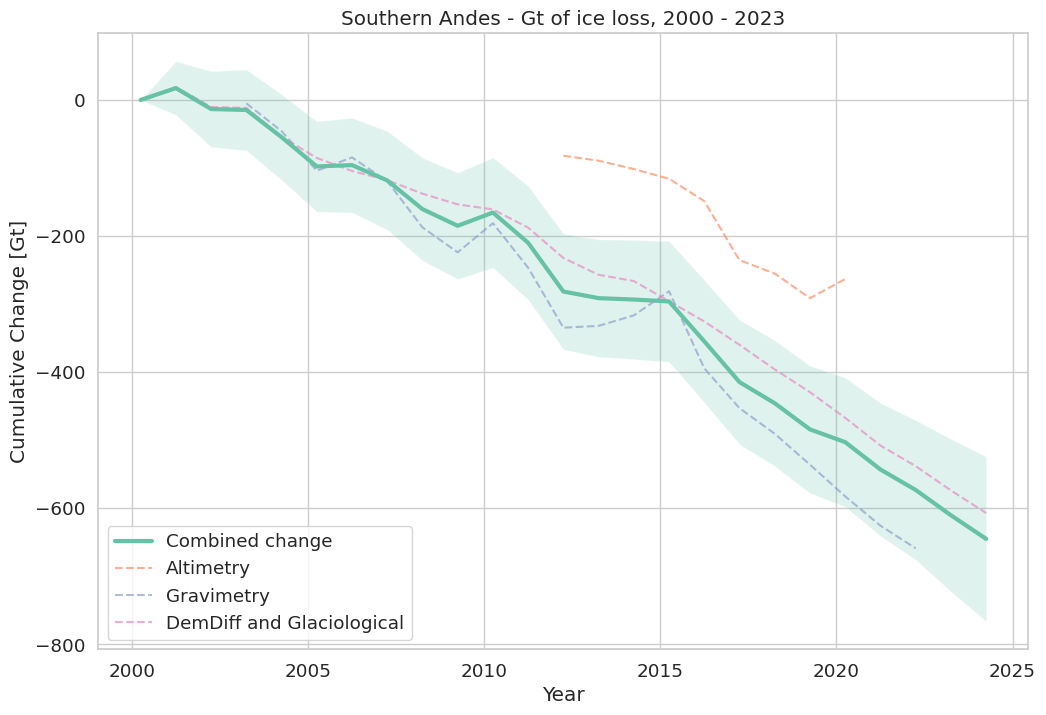

In [13]:
single_region_cumulative_plot(cumulative_data_all_gt, cumulative_errors_all_gt, region.value, 'Gt',
                              cumulative_data_altimetry_gt, cumulative_data_gravimetry_gt, cumulative_data_demdiff_and_glaciological_gt)

<div>

## <strong>Choose an additional region to perform a simple comparison</strong>
</div>

Use the following dropdown to pick a second GlaMBIE region. 

In [14]:
comparison_region = glambie_regions_dropdown(region.value)
comparison_region

Dropdown(description='Region:', options={'Alaska': '1_alaska', 'Western Canada & US': '2_western_canada_us', '…

In [15]:
for filename in list_of_csvs:
    if comparison_region.value in filename:
        region_dataframe_comparison = pd.read_csv(filename)

In [16]:
cumulative_data_all_gt_comparison = derivative_to_cumulative(region_dataframe_comparison.start_dates, region_dataframe_comparison.end_dates, region_dataframe_comparison.combined_gt)
cumulative_errors_all_gt_comparison = derivative_to_cumulative(region_dataframe_comparison.start_dates, region_dataframe_comparison.end_dates, region_dataframe_comparison.combined_gt_errors, calculate_as_errors=True)

cumulative_data_all_mwe_comparison = derivative_to_cumulative(region_dataframe_comparison.start_dates, region_dataframe_comparison.end_dates, region_dataframe_comparison.combined_mwe)
cumulative_errors_all_mwe_comparison = derivative_to_cumulative(region_dataframe_comparison.start_dates, region_dataframe_comparison.end_dates, region_dataframe_comparison.combined_mwe_errors, calculate_as_errors=True)

In the final plot shown below, we compare the cumulative change for the two regions that you have chosen. In the left panel, we compare the cumulative change in Gt. If you have picked regions that vary signifcantly in size, one may have a much larger total change in Gt. In the right panel, we compare the cumulative change in metres water equivalent, which allows a comparison that removes the impact of glacier area.

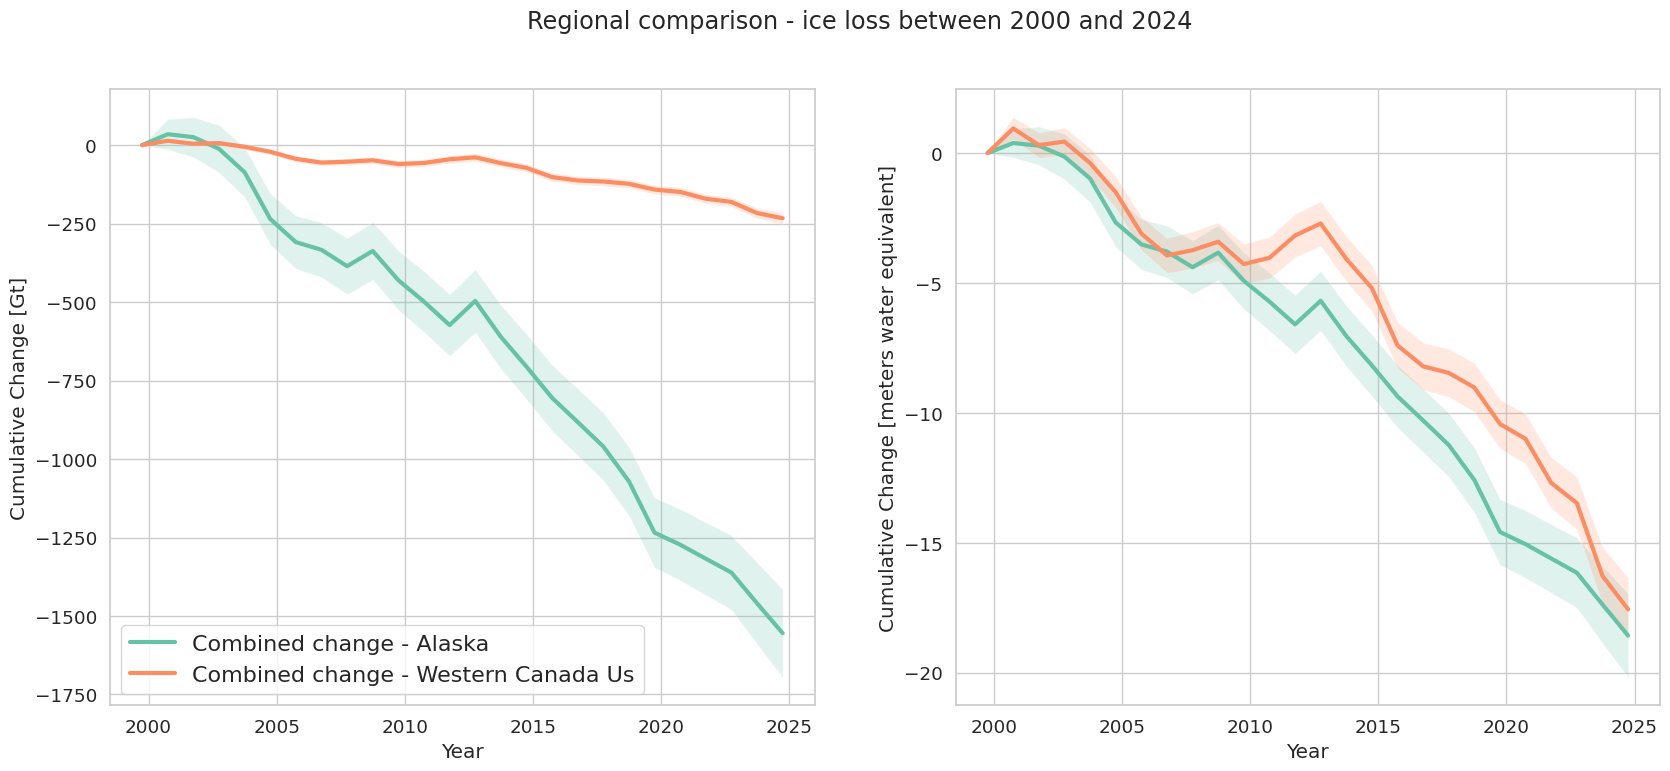

In [17]:
region_comparison_plot(region.value, comparison_region.value, cumulative_data_all_gt, cumulative_errors_all_gt, cumulative_data_all_gt_comparison,
                       cumulative_errors_all_gt_comparison, cumulative_data_all_mwe, cumulative_errors_all_mwe,
                       cumulative_data_all_mwe_comparison, cumulative_errors_all_mwe_comparison)
